In [124]:
# Initialize OK
from client.api.notebook import Notebook
ok = Notebook('proj2b.ok')

Assignment: proj2b
OK, version v1.13.11



# Project 2 Part B: Spam/Ham Classification
## Classifiers
### The assignment is due on Monday, April 27th at 11:59pm PST.

**Collaboration Policy**

Data science is a collaborative activity. While you may talk with others about
the project, we ask that you **write your solutions individually**. If you do
discuss the assignments with others please **include their names** at the top
of your notebook.

**Collaborators**: *list collaborators here*

## This Assignment
In Project 2 Part A, you made an effort to understand the data through EDA, and did some basic feature engineering. You also built a Logistic Regression model to classify Spam/Ham emails. In Part B, you will learn how to evaluate the classifiers you built. You will also have the chance to improve your model by selecting more features.

## Warning
We've tried our best to filter the data for anything blatantly offensive as best as we can, but unfortunately there may still be some examples you may find in poor taste. If you encounter these examples and believe it is inappropriate for students, please let a TA know and we will try to remove it for future semesters. Thanks for your understanding!

## Score Breakdown
Question | Points
--- | ---
6a | 1
6b | 1
6c | 2
6d | 2
6e | 1
6f | 3
7 | 6
8 | 6
9 | 15
Total | 37

## Setup

In [125]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style = "whitegrid", 
        color_codes = True,
        font_scale = 1.5)

#my imports for Question 7/8
import plotly.graph_objects as go
import re
import plotly.express as px

In [126]:
from utils import fetch_and_cache_gdrive
fetch_and_cache_gdrive('1SCASpLZFKCp2zek-toR3xeKX3DZnBSyp', 'train.csv')
fetch_and_cache_gdrive('1ZDFo9OTF96B5GP2Nzn8P8-AL7CTQXmC0', 'test.csv')

original_training_data = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

# Convert the emails to lower case as a first step to processing the text
original_training_data['email'] = original_training_data['email'].str.lower()
test['email'] = test['email'].str.lower()

original_training_data.head()

from sklearn.model_selection import train_test_split

train, val = train_test_split(original_training_data, test_size=0.1, random_state=42)

Using version already downloaded: Wed Apr 22 09:36:11 2020
MD5 hash of file: 0380c4cf72746622947b9ca5db9b8be8
Using version already downloaded: Wed Apr 22 09:36:12 2020
MD5 hash of file: a2e7abd8c7d9abf6e6fafc1d1f9ee6bf


The following code is adapted from Part A of this project. You will be using it again in Part B.

In [127]:
def words_in_texts(words, texts):
    '''
    Args:
        words (list-like): words to find
        texts (Series): strings to search in
    
    Returns:
        NumPy array of 0s and 1s with shape (n, p) where n is the
        number of texts and p is the number of words.
    '''
    indicator_array = 1 * np.array([texts.str.contains(word) for word in words]).T
    return indicator_array

some_words = ['drug', 'bank', 'prescription', 'memo', 'private']

X_train = words_in_texts(some_words, train['email'])
Y_train = np.array(train['spam'])

X_train[:5], Y_train[:5]

(array([[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0]]), array([0, 0, 0, 0, 0]))

Recall that you trained the following model in Part A.

In [128]:
from sklearn.linear_model import LogisticRegression

model =  LogisticRegression()
model.fit(X_train, Y_train)

training_accuracy = model.score(X_train, Y_train)
print("Training Accuracy: ", training_accuracy)

Training Accuracy:  0.7576201251164648


## Evaluating Classifiers

The model you trained doesn't seem too shabby! But the classifier you made above isn't as good as this might lead us to believe. First, we are evaluating accuracy on the training set, which may provide a misleading accuracy measure, especially if we used the training set to identify discriminative features. In future parts of this analysis, it will be safer to hold out some of our data for model validation and comparison.

Presumably, our classifier will be used for **filtering**, i.e. preventing messages labeled `spam` from reaching someone's inbox. There are two kinds of errors we can make:
- False positive (FP): a ham email gets flagged as spam and filtered out of the inbox.
- False negative (FN): a spam email gets mislabeled as ham and ends up in the inbox.

These definitions depend both on the true labels and the predicted labels. False positives and false negatives may be of differing importance, leading us to consider more ways of evaluating a classifier, in addition to overall accuracy:

**Precision** measures the proportion $\frac{\text{TP}}{\text{TP} + \text{FP}}$ of emails flagged as spam that are actually spam.

**Recall** measures the proportion $\frac{\text{TP}}{\text{TP} + \text{FN}}$ of spam emails that were correctly flagged as spam. 

**False-alarm rate** measures the proportion $\frac{\text{FP}}{\text{FP} + \text{TN}}$ of ham emails that were incorrectly flagged as spam. 

The following image might help:

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/700px-Precisionrecall.svg.png" width="500px">

Note that a true positive (TP) is a spam email that is classified as spam, and a true negative (TN) is a ham email that is classified as ham.

### Question 6a

Suppose we have a classifier `zero_predictor` that always predicts 0 (never predicts positive). How many false positives and false negatives would this classifier have if it were evaluated on the training set and its results were compared to `Y_train`? Fill in the variables below (answers can be hard-coded):

*Tests in Question 6 only check that you have assigned appropriate types of values to each response variable, but do not check that your answers are correct.*

<!--
BEGIN QUESTION
name: q6a
points: 1
-->

In [129]:
zero_predictor_fp = 0
zero_predictor_fn = np.sum(Y_train)

In [130]:
ok.grade("q6a");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



### Question 6b

What are the accuracy and recall of `zero_predictor` (classifies every email as ham) on the training set? Do **NOT** use any `sklearn` functions.

<!--
BEGIN QUESTION
name: q6b
points: 1
-->

In [131]:
zero_predictor_acc = 0
zero_predictor_recall = 0

In [132]:
ok.grade("q6b");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



### Question 6c

Provide brief explanations of the results from 6a and 6b. Explain why the number of false positives, number of false negatives, accuracy, and recall all turned out the way they did.

<!--
BEGIN QUESTION
name: q6c
manual: True
points: 2
-->
<!-- EXPORT TO PDF -->

For 6a, there will never be any false positives because the zero_predictor will never predict a 1 (spam email) but as a result there will be a lot of false negatives (1918) because none of the true positives were correctly predicted. As a result, the model has both bad coverage (recall of 0) and bad precision (accuracy of 0).

### Question 6d

Compute the precision, recall, and false-alarm rate of the `LogisticRegression` classifier created and trained in Part A. Do **NOT** use any `sklearn` functions.

**Note: In lecture we used the `sklearn` package to compute the rates. Here you should work through them using just the definitions to help build a deeper understanding.**

<!--
BEGIN QUESTION
name: q6d
points: 2
-->

In [133]:
Y_train_hat = model.predict(X_train)
logistic_predictor_precision = np.sum((Y_train_hat==1)&(Y_train==1))/(np.sum(1*Y_train_hat))
logistic_predictor_recall = np.sum((Y_train_hat==1)&(Y_train==1))/(np.sum(1*Y_train))
false_positives = np.sum((Y_train_hat==1)&(Y_train==0))
true_negatives = np.sum((Y_train_hat==0)&(Y_train==0))
logistic_predictor_far = np.sum((Y_train_hat==1)&(Y_train==0))/(false_positives+true_negatives)

In [134]:
ok.grade("q6d");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 3
    Failed: 0
[ooooooooook] 100.0% passed



In [135]:
log_class_fp = np.sum((Y_train_hat==1)&(Y_train==0))
log_class_fn = np.sum((Y_train_hat==0)&(Y_train==1))
print('Logistic Regression classifier')
print('False Postives: '+str(log_class_fp))
print('False Negatives: '+str(log_class_fn))

Logistic Regression classifier
False Postives: 122
False Negatives: 1699


### Question 6e

Are there more false positives or false negatives when using the logistic regression classifier from Part A?

<!--
BEGIN QUESTION
name: q6e
manual: True
points: 1
-->
<!-- EXPORT TO PDF -->

As shown above, there are more false negatives when using the logistic regression classifier from Part A. 

### Question 6f

1. Our logistic regression classifier got 75.8% prediction accuracy (number of correct predictions / total). How does this compare with predicting 0 for every email?
1. Given the word features we gave you above, name one reason this classifier is performing poorly. Hint: Think about how prevalent these words are in the email set.
1. Which of these two classifiers would you prefer for a spam filter and why? Describe your reasoning and relate it to at least one of the evaluation metrics you have computed so far.

<!--
BEGIN QUESTION
name: q6f
manual: True
points: 3
-->
<!-- EXPORT TO PDF -->

1. Our Logistic Regression classifier had a higher accuracy than our zero predictor, which did not correctly classify any spam emails. 

2. One reason this classifier is performing poorly could be that these words are non-informative because spam emails almost never contain these words (at least the ones I've received). As a result, our classifier will have difficulty distinguishing spam and have a tendency to classify emails as ham or 0. This is indicated by our high number of false negatives because our classifier is probably disproportionately classifying emails as ham.

3. I would rather have the zero predictor because the inaccuracy of our LogReg classifier would result in more damage because I would potentially miss ham emails due to them being filed as spam (shown by the high number of false positives) and I would still have a lot of un-filtered out spam emails in my regular inbox (indicated by our extremely high false negative number) so this risk would not be worth it to me. 

## Moving Forward

With this in mind, it is now your task to make the spam filter more accurate. In order to get full credit on the accuracy part of this assignment, you must get at least **88%** accuracy on the test set. To see your accuracy on the test set, you will use your classifier to predict every email in the `test` DataFrame and upload your predictions to Kaggle.

**Kaggle limits you to four submissions per day**. This means you should start early so you have time if needed to refine your model. You will be able to see your accuracy on the entire set when submitting to Kaggle (the accuracy that will determine your score for question 9).

Here are some ideas for improving your model:

1. Finding better features based on the email text. Some example features are:
    1. Number of characters in the subject / body
    1. Number of words in the subject / body
    1. Use of punctuation (e.g., how many '!' were there?)
    1. Number / percentage of capital letters 
    1. Whether the email is a reply to an earlier email or a forwarded email
1. Finding better (and/or more) words to use as features. Which words are the best at distinguishing emails? This requires digging into the email text itself. 
1. Better data processing. For example, many emails contain HTML as well as text. You can consider extracting out the text from the HTML to help you find better words. Or, you can match HTML tags themselves, or even some combination of the two.
1. Model selection. You can adjust parameters of your model (e.g. the regularization parameter) to achieve higher accuracy. Recall that you should use cross-validation to do feature and model selection properly! Otherwise, you will likely overfit to your training data.

You may use whatever method you prefer in order to create features, but **you are not allowed to import any external feature extraction libraries**. In addition, **you are only allowed to train logistic regression models**. No random forests, k-nearest-neighbors, neural nets, etc.

We have not provided any code to do this, so feel free to create as many cells as you need in order to tackle this task. However, answering questions 7, 8, and 9 should help guide you.

---

**Note:** *You should use the **validation data** to evaluate your model and get a better sense of how it will perform on the Kaggle evaluation.*

---

In [136]:
#EXPLORATORY DATA ANALYSIS:

In [137]:
#to avoid mutating original train dataset
t=train.copy()

In [138]:
t['email'].sample(20)

2297    if you're not in doolin, beg, borrow, or steal...
407     url: http://diveintomark.org/archives/2002/10/...
6855    sorted.  i've got someone...\n \n thanks,\n co...
6533    url: http://www.newsisfree.com/click/-0,861366...
6409        >> i wrote a script some time ago to try a...
2879    use perl daily headline mailer\n \n this week ...
1166    hey\n \n since i upgraded to redhat8 mplayer -...
5938    <!doctype html public "-//w3c//dtd html 4.0 tr...
4079    ------=_nextpart_84815c5abaf209ef376268c8\n co...
5179    \n --4ckj6ujge2in1+ky\n content-type: text/pla...
989     > dunno about the other tools, but spamassassi...
5930    http://www.hughes-family.org/bugzilla/show_bug...
2458    url: http://www.newsisfree.com/click/-2,867038...
2765    i dunno, bb.  women who like to be thought of ...
4317    <html>\n <head>\n <title>tech update today</ti...
4457    \n [i wrote this last night but it appears i n...
8016    > the impression i get from reading lkml the o...
3585    url: h

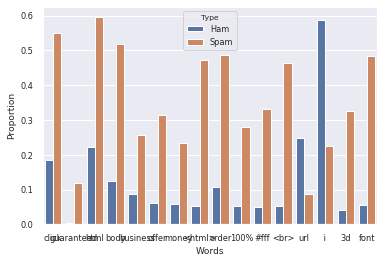

In [139]:
# Finding Better Words
certain_words = ['click','guaranteed','html', 'body', 'business', 'offer', 'money', '<html>', 'order', '100%', '#fff', '<br>', 'url', ' i ', '3d', 'font']

ham_df = pd.DataFrame(words_in_texts(certain_words, t.loc[t['spam']==0]['email']))
ham_df.columns=certain_words 
ham_proportions= [ham_df[i].sum()/len(ham_df) for i in ham_df.columns]

spam_df= pd.DataFrame(words_in_texts(certain_words, t.loc[t['spam']==1]['email']))
spam_df.columns=certain_words 
spam_proportions= [spam_df[i].sum()/len(spam_df) for i in spam_df.columns]

prop_df = pd.DataFrame({'Ham':ham_proportions,'Spam':spam_proportions, 'Words':certain_words})
prop_df = prop_df.melt(id_vars='Words', var_name='Type', value_name='Proportion')

sns.set(font_scale=0.75)
sns.barplot(x='Words', y='Proportion', hue='Type', data=prop_df)

In [140]:
# length of body email
body_lengths = [len(e) for e in t['email']]
t['body lengths'] = body_lengths
t.groupby(by='spam').agg({'body lengths': 'mean'})

,body lengths
spam,
0,2986.580518
1,5528.656413


In [141]:
#length of subject
subj_lengths = [len(s) if type(s)!=float else 0 for s in t['subject']]
t['subject lengths'] = subj_lengths
t.groupby(by='spam').agg({'subject lengths': 'mean'})

,subject lengths
spam,
0,46.389991
1,50.422836


In [142]:
t['subject'] = t['subject'].fillna(value='')
wlengths = [len(s.split()) if type(s)!=float else 0 for s in t['email']]
t['email number of words'] = wlengths
t.groupby(by='spam').agg({'email number of words': 'mean'})

,email number of words
spam,
0,332.347096
1,457.671533


In [193]:
t['email'].iloc[0].split()[3]

'playing'

In [194]:
words = [s.split() for s in t['email']]
url_starts = [1 if ((len(s.split())>3) and ((s.split()[0]=='url:') or (s.split()[1]=='url:') or (s.split()[2]=='url:') or (s.split()[3]=='url:'))) else 0 for s in t['email']]
t['url starts'] = url_starts
t.groupby(by='spam').agg({'url starts': 'count'})

,url starts
spam,
0,5595
1,1918


In [143]:
#whether the email is a reply
t['subject'] = t['subject'].fillna(value='')
replies = [1 if ('Re:' in s) else 0 for s in t['subject']]
t['replies']=replies
t.groupby(by='spam').agg({'replies': 'count'})

,replies
spam,
0,5595
1,1918


In [144]:
#whether the email is Forwarded
t['subject'] = t['subject'].fillna(value='')
fwds = [1 if ('Fw:' in s) else 0 for s in t['subject']]
t['forwards']=fwds
t.groupby(by='spam').agg({'forwards': 'count'})

,forwards
spam,
0,5595
1,1918


In [145]:
# count of punctuation
import re
pattern = r'\W'
punc_counts = [len(re.findall(pattern, s)) for s in t['email']]
t['punc counts'] = punc_counts
t.groupby(by='spam').agg({'punc counts': 'mean'})

,punc counts
spam,
0,946.980340
1,1583.290407


In [146]:
pattern = r'<>'
html_counts = [len(re.findall(r'html', s)) for s in t['email']]
t['html counts']= html_counts
t.groupby(by='spam').agg({'html counts': 'mean'})

,html counts
spam,
0,1.076139
1,2.179875


In [227]:
def count_capitals(string):
    count=0
    for i in range(len(string)):
        if string[i.isupper():
            count+=1
    return count


cap_counts = [count_capitals(str(e)) for e in t['email']]

t['cap counts']= cap_counts
t.groupby(by='spam').agg({'cap counts': 'mean'})

AttributeError: 'str' object has no attribute 'str'

In [197]:
#feature function to extract features for X train dataframe
def phi(df):
    df_new = pd.DataFrame(words_in_texts(certain_words, df['email']))
    df_new.columns = certain_words
    df_new['number of characters in body'] = [len(e) for e in df['email']]
    df_new['number of words in body']=[len(s.split()) if type(s)!=float else 0 for s in df['email']]
    df['subject'] = df['subject'].fillna(value='')
    df_new['number of words in subject'] = [len(s.split()) if type(s)!=float else 0 for s in df['subject']]
    df_new['replies'] = [1 if ('Re:' in s) else 0 for s in df['subject']]
    df_new['fwds']= [1 if ('Fw:' in s) else 0 for s in df['subject']]
    df_new['punc counts'] = [len(re.findall(r'\W', s)) for s in df['email']]
    df_new['html counts'] = [len(re.findall(r'html', s)) for s in df['email']]
    df_new['# counts'] = [len(re.findall(r'#', s)) for s in df['email']]
    df_new['! counts']= [len(re.findall(r'!', s)) for s in df['email']]
    df_new['url starts'] = [1 if ((len(s.split())>3) and ((s.split()[0]=='url:') or (s.split()[1]=='url:') or (s.split()[2]=='url:') or (s.split()[3]=='url:'))) else 0 for s in df['email']]
    return df_new
X_train_new = phi(train)

/srv/conda/envs/data100/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [198]:
# new val DF
val_new = phi(val)

/srv/conda/envs/data100/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [199]:
from sklearn.linear_model import LogisticRegressionCV

In [200]:
Y_train = train['spam']

model =  LogisticRegressionCV(solver='liblinear', Cs=10, max_iter=10000)
model.fit(X_train_new, Y_train)

training_accuracy = model.score(X_train_new, Y_train)
print("Training Accuracy: ", training_accuracy)

Training Accuracy:  0.9172101690403301


In [201]:
print("Validation Accuracy:" +str(model.score(val_new, val['spam'])))

Validation Accuracy:0.925748502994012


In [202]:
train_accuracy = (1/len(Y_train))*np.sum(1*(Y_train==model.predict(X_train_new)))

print(f"Train accuracy: {train_accuracy:.4f}")


Train accuracy: 0.9172


Confusion matrix, without normalization
[[594  19]
 [ 43 179]]
Normalized confusion matrix
[[0.96900489 0.03099511]
 [0.19369369 0.80630631]]


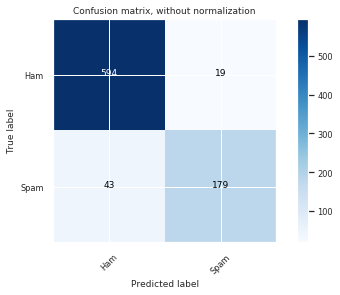

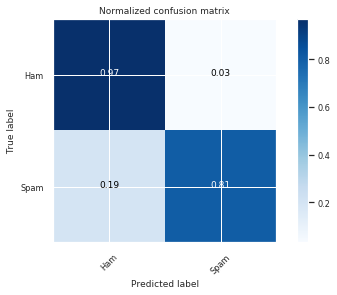

In [203]:
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(val['spam'], model.predict(val_new))

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
class_names = ['Ham', 'Spam']
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

In [204]:
def jitter(data, amt=0.1):
    return data + amt * np.random.rand(len(data)) - amt/2.0

X = X_train_new[['number of words in body']].to_numpy()
Y = t['spam'].astype(float).to_numpy()
points = go.Scatter(x=X.flatten(), y = jitter(Y),
                    mode="markers", 
                    marker=dict(opacity=0.5))
layout = dict(xaxis=dict(title="Body Length"),yaxis=dict(title="Spam"))
go.Figure(data=[points], layout=layout)


In [205]:
def threshold_predict(model, X, threshold): 
    return np.where(model.predict_proba(X)[:,1] > threshold, 1.0, 0.0)

def accuracy(threshold, X, Y):
    return np.mean(threshold_predict(model, X, threshold) == Y)

thresholds = np.linspace(0, 1, 10)

In [206]:
accs = [accuracy(t, X_train_new, Y_train) for t in thresholds]

In [207]:
fig = px.line(x=thresholds, y=accs)
fig.update_xaxes(title="threshold")
fig.update_yaxes(title="Accuracy")

In [159]:
#cross validation to choose features

In [208]:
y_pred = model.predict(val_new) 

precision = np.sum((y_pred==1)&(val['spam']==1))/(np.sum(1*(y_pred)))
recall = np.sum((y_pred==1)&(val['spam']==1))/(np.sum(1*(val['spam'])))

print(f'precision = {precision:.4f}')
print(f'recall = {recall:.4f}')

precision = 0.9040
recall = 0.8063


In [209]:
from sklearn import metrics

In [210]:
precision, recall, threshold = metrics.precision_recall_curve(Y_train, model.predict_proba(X_train_new)[:, 1])

In [211]:
fig = px.line(x=recall[:-1], y = precision[:-1], hover_name=threshold)
fig.update_xaxes(title="Recall")
fig.update_yaxes(title="Precision")
fig

In [212]:
from sklearn.model_selection import cross_val_score

X = phi(train)
Y = train['spam']

lr_model = LogisticRegressionCV(solver='liblinear', Cs=10, max_iter=10000)
print(cross_val_score(lr_model, X, Y))


/srv/conda/envs/data100/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



[0.92015968 0.9095143  0.91417166 0.91478029 0.92343542]


In [213]:
print(cross_val_score(lr_model, phi(val), val['spam'], cv=5))

/srv/conda/envs/data100/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



[0.88622754 0.91616766 0.94011976 0.94610778 0.90419162]


In [214]:
new_model = LogisticRegressionCV(solver='liblinear', Cs=10, max_iter=10000)

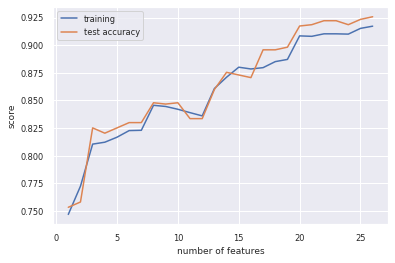

In [221]:
train_accuracy_vs_N = []
val_accuracy_vs_N = []

range_of_num_features = range(1, X_train_new.shape[1] + 1)

for N in range_of_num_features:
    X_train_first_N_features = X_train_new.iloc[:, :N]    
    
    new_model.fit(X_train_first_N_features, Y_train)
    train_accuracy =  new_model.score(X_train_first_N_features, Y_train)
    train_accuracy_vs_N.append(train_accuracy)
    
    val_y = val['spam']
    val_first_N_features = val_new.iloc[:, :N]
    val_accuracy = new_model.score(val_first_N_features, val_y)   
    val_accuracy_vs_N.append(val_accuracy)
    
plt.plot(range_of_num_features, train_accuracy_vs_N)
plt.plot(range_of_num_features, val_accuracy_vs_N)
plt.legend(["training", "test accuracy"])
plt.xlabel("number of features")
plt.ylabel("score");

### Question 7: Feature/Model Selection Process

In the following cell, describe the process of improving your model. You should use at least 2-3 sentences each to address the follow questions:

1. How did you find better features for your model?
2. What did you try that worked / didn't work?
3. What was surprising in your search for good features?

<!--
BEGIN QUESTION
name: q7
manual: True
points: 6
-->
<!-- EXPORT TO PDF -->

1. Initially, to find better features for my model, I began by randomly sampling from the dataframe so that I could see the actual structure of the data and try to develop any hypotheses of thing spam/ham emails could have in common. From there, I chose the words to select that I thought would be good indicators and engineered new features such as whether or not an email was a reply or forward, the number of words in the email body, count of different types of punctuation ( specifically including the '!', '#', or 'html' counts. Once I had developed these features, I compared the results between spam/ham (ie. visualizing the results, taking averages for spam/ham groups, etc.) and decided whether or not it could be an informative feature to include in my model. After training my model with teh features, I looked at the cross validation scores to make sure it was performing well and not tending to overfit. 

2. Things that brought my accuracy up dramatically included punctuation counts (spam emails had a lot more #, !, etc.), classification of forwarded and reply emails, and also picking useful words. Once I had an accuracy of around 90%, what improved my score was picking words that indicated ham emails as opposed to the words I'd been using which were all more common in spam emails. What did not work as well was my attempt to modify parameters such as the decision threshold-- which, through cross validation, I found was already optimized at the default value. 

3. Something that surprised me in my search for good features was that my initial instincts of informative features were not always the ones that greatly impacted my accuracy. For example, I expected there to be a much higher count of html tags in spam emails because they seemed to contain a lot of them when I was manually looking into the dataframe. However, this feature did not raise my accuracy much higher than it already was. 

### Question 8: EDA

In the cell below, show a visualization that you used to select features for your model. Include

1. A plot showing something meaningful about the data that helped you during feature selection, model selection, or both.
2. Two or three sentences describing what you plotted and its implications with respect to your features.

Feel to create as many plots as you want in your process of feature selection, but select one for the response cell below.

**You should not just produce an identical visualization to question 3.** Specifically, don't show us a bar chart of proportions, or a one-dimensional class-conditional density plot. Any other plot is acceptable, as long as it comes with thoughtful commentary. Here are some ideas:

1. Consider the correlation between multiple features (look up correlation plots and `sns.heatmap`). 
1. Try to show redundancy in a group of features (e.g. `body` and `html` might co-occur relatively frequently, or you might be able to design a feature that captures all html tags and compare it to these). 
1. Visualize which words have high or low values for some useful statistic.
1. Visually depict whether spam emails tend to be wordier (in some sense) than ham emails.

Generate your visualization in the cell below and provide your description in a comment.

<!--
BEGIN QUESTION
name: q8
manual: True
format: image
points: 6
-->
<!-- EXPORT TO PDF format:image -->

/srv/conda/envs/data100/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



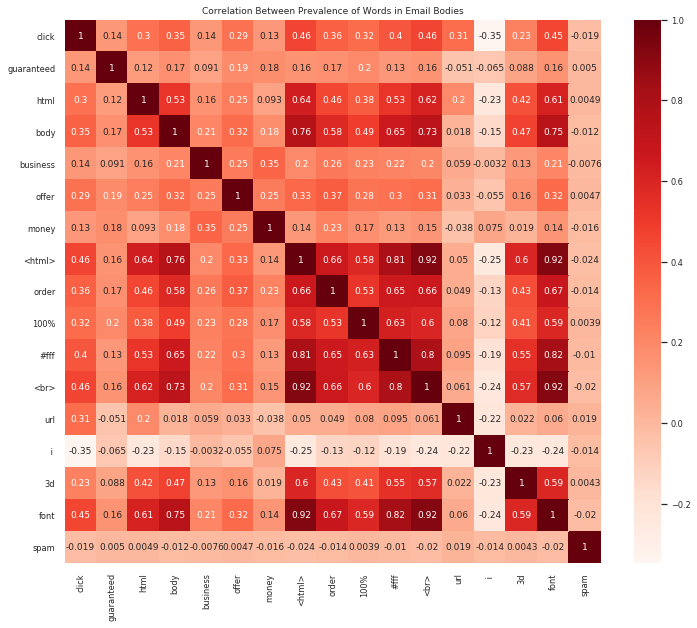

In [222]:
# Write your description (2-3 sentences) as a comment here:
# In the plot below, I have visualized the correlation via a heatmap between words 
#I selected to distinguish spam/ham emails. This visualization clearly shows which words 
#are strongly positively correlated and likely to be in similar emails. For example, the presence of the 
#personal pronoun 'i'  (a word I found to be much more common in ham emails) was a word 
# with a negative correlation to the rest of my selected words which makes sense 
#because the rest are more common in spam emails, which alligns with my 
#expectations and reinforced my choice to include the feature in my model to better
#distinguish ham emails.

# Write the code to generate your visualization here:

data = phi(train)
data = data[['click', 'guaranteed', 'html', 'body', 'business', 'offer', 'money',
       '<html>', 'order', '100%', '#fff', '<br>', 'url', ' i ', '3d', 'font']]
data['spam']=train['spam']
plt.figure(figsize=(12,10))
cor = data.corr()
plt.xlabel('Model Feature Word')
plt.ylabel('Model Feature Word')
plt.title('Correlation Between Prevalence of Words in Email Bodies')
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

# Note: if your plot doesn't appear in the PDF, you should try uncommenting the following line:
# plt.show(0, 50000)

# Question 9: Submitting to Kaggle

The following code will write your predictions on the test dataset to a CSV, which you can submit to Kaggle. You may need to modify it to suit your needs.

Save your predictions in a 1-dimensional array called `test_predictions`. *Even if you are not submitting to Kaggle, please make sure you've saved your predictions to `test_predictions` as this is how your score for this question will be determined.*

Remember that if you've performed transformations or featurization on the training data, you must also perform the same transformations on the test data in order to make predictions. For example, if you've created features for the words "drug" and "money" on the training data, you must also extract the same features in order to use scikit-learn's `.predict(...)` method.

You should submit your CSV files to https://www.kaggle.com/t/c76d80f7d3204159865a324ec2936f18

**Note: You may submit up to 4 times a day. If you have submitted 4 times on a day, you will need to wait until the next day for more submissions.**

Note that this question is graded on an absolute scale based on the accuracy your model achieves on the test set and the score does not depend on your ranking on Kaggle. 

*The provided tests check that your predictions are in the correct format, but you must submit to Kaggle to evaluate your classifier accuracy.*

<!--
BEGIN QUESTION
name: q9
points: 15
-->

In [223]:
test_predictions = model.predict(phi(test))

In [224]:
ok.grade("q9");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 3
    Failed: 0
[ooooooooook] 100.0% passed



The following saves a file to submit to Kaggle.

In [225]:
from datetime import datetime

# Assuming that your predictions on the test set are stored in a 1-dimensional array called
# test_predictions. Feel free to modify this cell as long you create a CSV in the right format.

# Construct and save the submission:
submission_df = pd.DataFrame({
    "Id": test['id'], 
    "Class": test_predictions,
}, columns=['Id', 'Class'])
timestamp = datetime.isoformat(datetime.now()).split(".")[0]
submission_df.to_csv("submission_{}.csv".format(timestamp), index=False)

print('Created a CSV file: {}.'.format("submission_{}.csv".format(timestamp)))
print('You may now upload this CSV file to Kaggle for scoring.')

Created a CSV file: submission_2020-04-27T12:42:02.csv.
You may now upload this CSV file to Kaggle for scoring.


# Submit
Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output.
**Please save before submitting!**

<!-- EXPECT 5 EXPORTED QUESTIONS -->

In [226]:
# Save your notebook first, then run this cell to submit.
import jassign.to_pdf
jassign.to_pdf.generate_pdf('proj2b.ipynb', 'proj2b.pdf')
ok.submit()

Generating PDF...
Saved proj2b.pdf


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'proj2b.ipynb'.
Submit... 100% complete
Submission successful for user: nicolelinden20@berkeley.edu
URL: https://okpy.org/cal/data100/sp20/proj2b/submissions/NY87ON

